## Context
For the purpose of this assignment, we are going to assume that this EDA has been requested by a hotel chain looking to understand what drives people to book airbnbs. Resultly, we will be paying special attention to price, size, and location, but also to whether allowing pets or smoking are related to a higher or lower rating.

## 1: Basic exploration

In [18]:
# Importing the libraries we will need to work with the data
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# Loading the data set
listings = pd.read_csv('./data/airbnb_nyc.csv')

In [7]:
# First look at the data set, checking the structure and that is has loaded as expected.
listings

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,36484363,QUIT PRIVATE HOUSE,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,THE PUBLIC TRANSPORTATION: THE TRAIN STATION I...,none,QUIT QUIT QUIT !!!!!!,TRAIN STATION 5 MINUTE UBER OR 15 MINUTE WALK ...,"Guest should not wear shoes, no smoking mariju...",107716952,42722.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
30175,36484665,Charming one bedroom - newly renovated rowhouse,"This one bedroom in a large, newly renovated r...","This one bedroom in a large, newly renovated r...",none,"There's an endless number of new restaurants, ...",We are three blocks from the G subway and abou...,NaN,8232441,41504.0,...,-1,1,-1,-1,1,-1,1,-1,-1,-1
30176,36485057,Affordable room in Bushwick/East Williamsburg,NaN,NaN,none,NaN,NaN,NaN,6570630,41419.0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
30177,36485609,43rd St. Time Square-cozy single bed,NaN,NaN,none,NaN,NaN,NaN,30985759,42104.0,...,-1,1,-1,-1,-1,-1,1,-1,-1,-1


Initially, we have 30719 rows and 81 columns. 

In [8]:
# Checking the column names to know what kind of information is available.
listings.columns

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


In [15]:
# Deleting any rows that are completely empty.
listings.dropna(how="all", inplace=True)
print(f"Number of rows after dropping empty ones:", listings.shape[0])

Number of rows after dropping empty ones: 30179


In [16]:
# Deleting any duplicated rows.
listings.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates:", listings.shape[0])

Number of rows after dropping duplicates: 30179


In [17]:
# Renaming the column 'price' to 'price_per_night' for more clarity.
listings.rename(
    columns={'price': 'price_per_night'}, inplace=True)
listings.columns

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price_per_night', 'guests_included',
       'extra_people', 'minimum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'calculated_host_listing

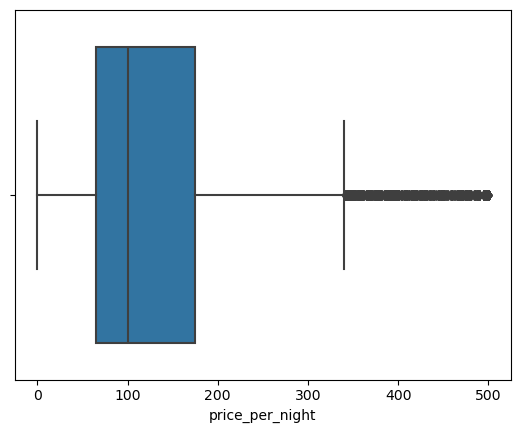

In [19]:
## 2: Focusing on price
sns.boxplot(x = "price_per_night", data =listings)

plt.show()